## **Sentiment Analysis- Arabic News** 
### *Evaluating Arabic News Attitudes towards America through NLP Analysis and a Predictive Classification Model*

***

 by: Andrew Rachuig, Kyle Green, Mindy Shiben, and Paige Rackley

### Introduction : 
*** 
The United States has made itself a key player in the Middle East by using its diplomatic, economic, and military power in support of national and international interests. Since the 9/11 terrorist attacks on U.S. soil, one of the most consequntial events in the modern world, tensions between the two regions have been undoubtedly high. With remarkable communication and technology enhancements in the 21st century, we've become more aware of biases portrayed in mainstream media, and Middle Eastern media is no exception. Two-thirds of Arab nationals overall say they trust mass media such as newspapers, TV, and radio to report news fully, fairly, and accurately (mideastmedia.org, 2017). Through examining almost half a million Arabic news articles between 2000 and 2014 from 10 different Middle Eastern news outlets, we can see how different factors (such as international events) may drive overall sentiment and sentiment towards America. Having this kind of insight may inform policy makers and influence decision making moving forward. This project can deliver an integral piece of the puzzle of America's foreign policy towards the world.

### Project Goals:
*** 
The goal of this project is to use the data we have acquired from our sources to build a classification model that can help predict an articles sentiment towards America. Through exploration using Natural Language Processing (NLP) and data visualizations, we want to find trends that will help us determine features to use in our model that will help us predict sentiment. By using NLP, we can deep dive into features further to even find correlations between specific words and sentiment that will help our predictions. 

### Summary of Findings:


Using our sentiment analysis tool (BERT), we discovered that approximently 73% of articles relating to America have a neutral sentiment, 23% were negative, and 4% were positive. 

Through exploration using Time Series analysis and Natural Language Processing (NLP), we also discovered notable outliers in sentiment from news sources and that some world events might have a relationship with article sentiment swings.

Our Random Forest model beat the baseline of 72.6% with an accuracy of 73.9%. This does beat our baseline, but is not predictive enough to be used to generalize sentiment in articles.


***

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import re
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from textwrap import wrap
import explore
from IPython.display import Image
from googletrans import Translator
from datetime import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split
import modeling
import split
import prepare


### Acquiring the Data
***
#### - All data was sourced from the [Abu El-Khair Corpus](http://abuelkhair.net/index.php/en/arabic/abu-el-khair-corpus)
        - Includes more than five million Arabic news articles from 2000-2014
        - Sourced from 10 different arabic news sources throughout the Middle East

#### - Downloaded 10 separate XML files containing all the articles (~ 20 GB)
_____

### Prepare the Data
Preparation for the data took a more considerable amount of effort. Upon inspection, we found that the XML contained errors, so we created a series of expressions to pull the data we needed and compiled it all into a dataframe.

With the new dataframe, we used keywords related to America (e.g 'George Bush, Barack Obama, America, The United States, The White House') and came out with about 360,000 articles to isolate and explore on.

Cleaning:
    - Sentiment analysis using Camel-Tools
    - remove unneccesary special characters
    - delete any possible diacritical marks
    - tokenize individual words 

______

### Univariate Exploration

In [2]:
data = pd.read_csv('daily8_5.csv')
#import data with sentiment analysis
data['dateline'] = pd.to_datetime(data.dateline)
#convert data type 
df = data.copy()
#make df copy for easy reference
df = df[df.text_label != 'False']
#drop rows that have not been assigned a sentiment due to being too large for now
df.info()
#snapshot of df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237706 entries, 1 to 331869
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           237706 non-null  int64         
 1   id              237706 non-null  object        
 2   url             237706 non-null  object        
 3   headline        237706 non-null  object        
 4   dateline        237706 non-null  datetime64[ns]
 5   text            237706 non-null  object        
 6   tags            237706 non-null  object        
 7   source          237706 non-null  object        
 8   text_label      237706 non-null  object        
 9   text_score      237706 non-null  object        
 10  headline_label  237706 non-null  object        
 11  headline_score  237706 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 23.6+ MB


## Exploration Part 1:  NLP Analysis

### Questions to Explore :
   - What is the frequency of sentiment labels (negative, positive, neutral) per news source?
   - What is the subject matter of the majority of articles per source?

### Frequency of sentiment labels (negative, positive, neutral) per news source

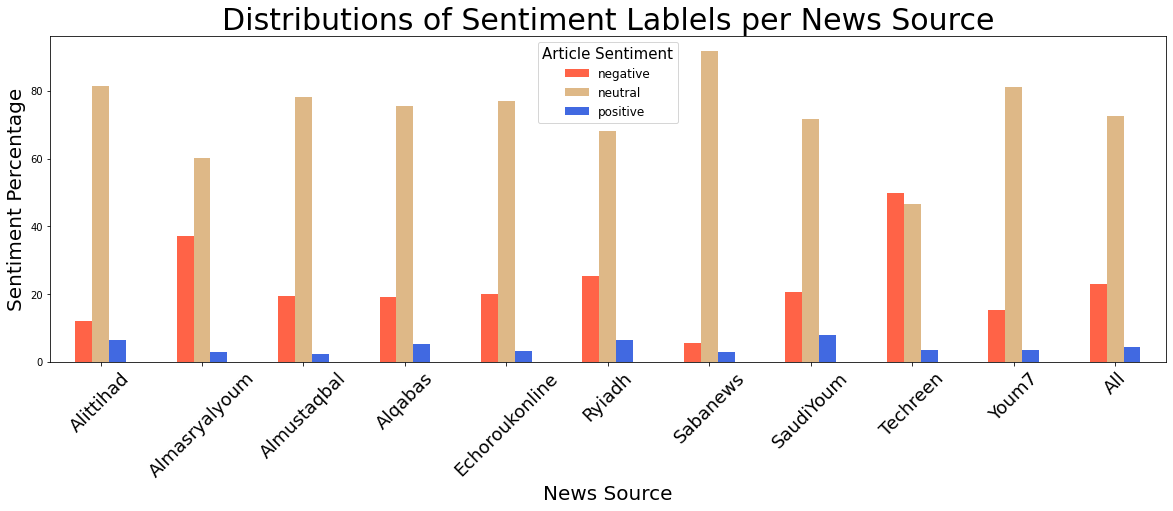

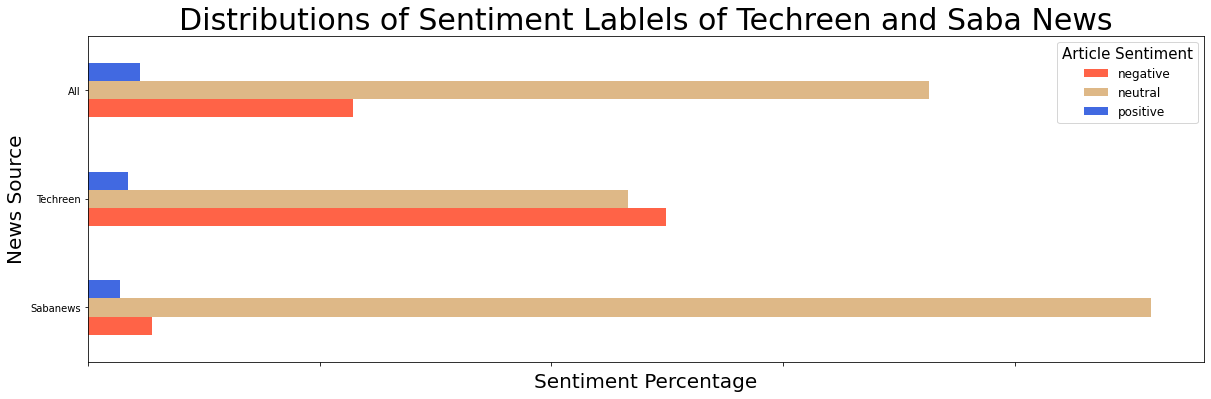

In [3]:
explore.graph_source(df)

### Takeaways 

- This first graph shows that it's clear some news sources tend to be more negative while others tend to be more neutral
- With Techreen being the most negative and Sabanews being the most neutral, we'll look at these subsets of our data with greater focus throughout exploration 


### What topics do news sources cover most frequently? 

- Looking at top 20 words, bigrams, and trigrams of overall averages of all sources, SabaNews (most neutral source), and Techreen (most negative source)

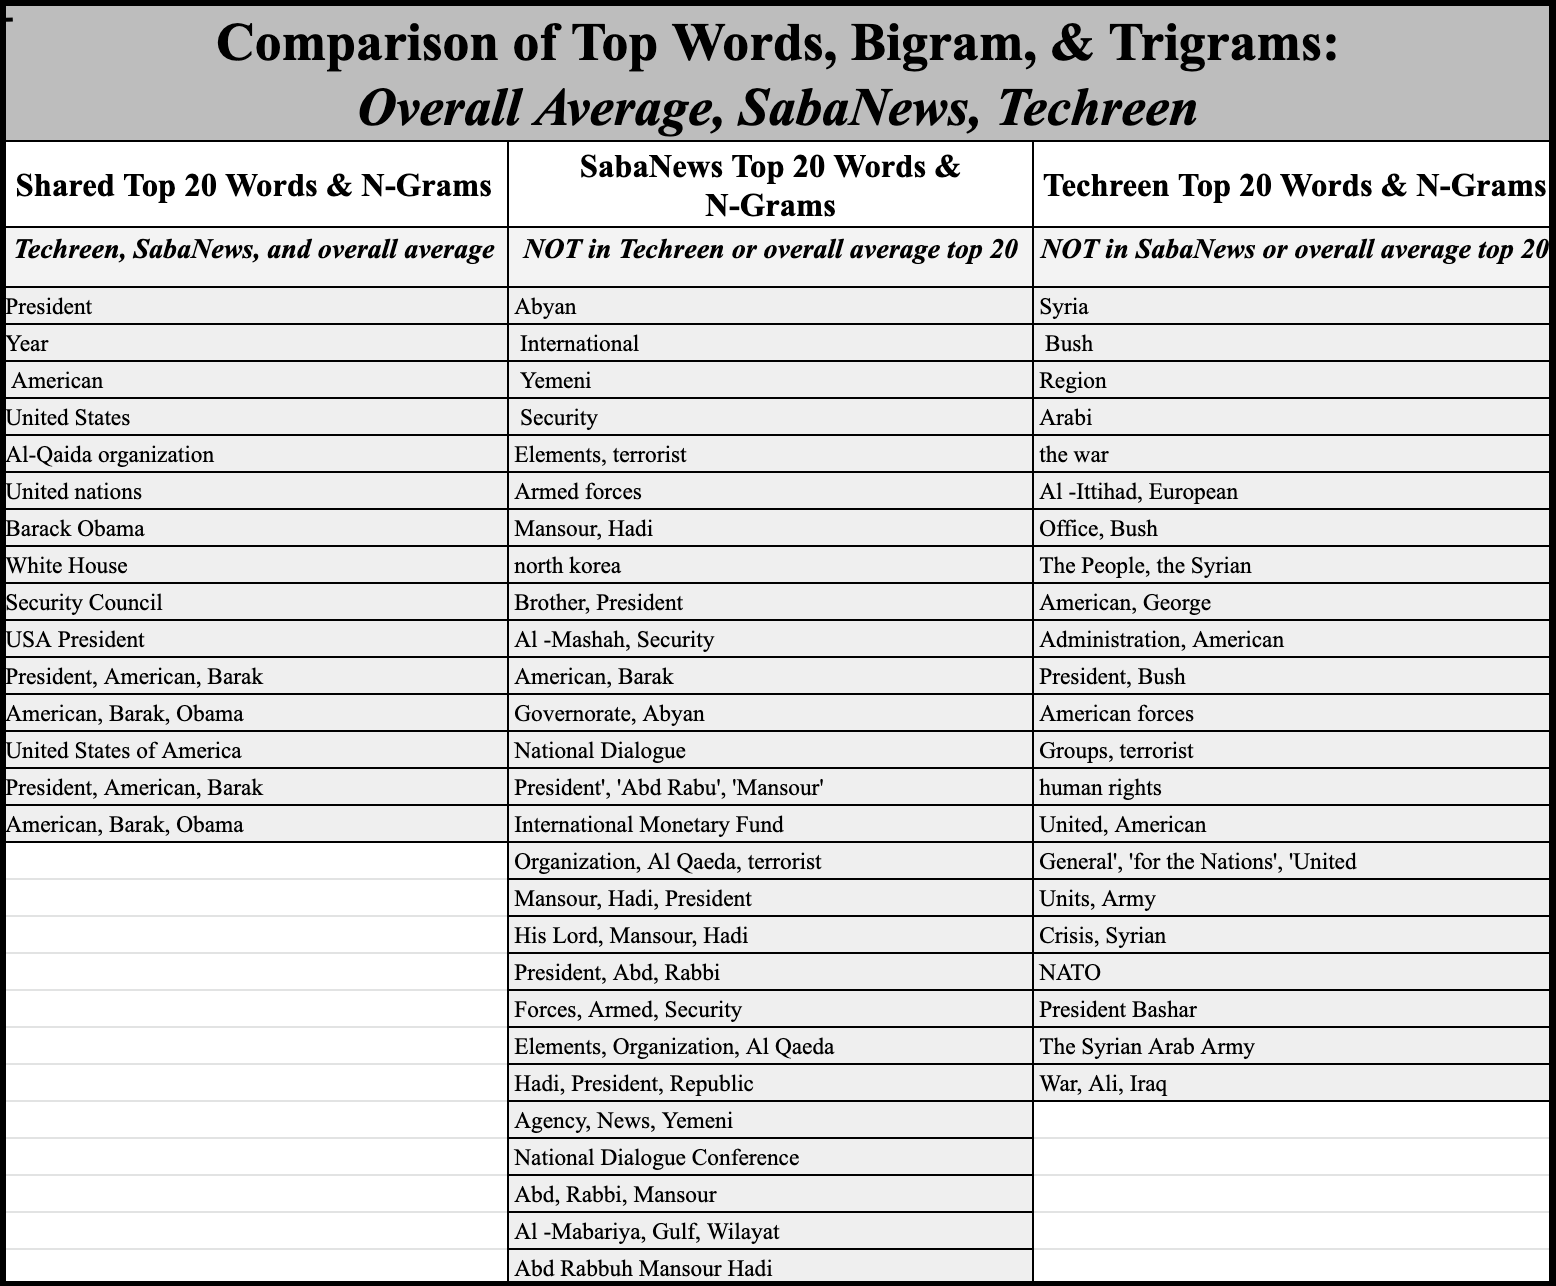

In [4]:
Image("compare_table.png")

### Frequency of Topics - Takeaways:

All talk about:
   - American presidents
   - The United Nations
   - The UN security council
   - The White House

Overall talks more about (compared to the following specific sources):
   - Osama bin Laden 
   - Hezbollah
   

Techreen talks more about:
   - The war in Iraq
   - The US sec of state
   - US State Dept.
   - The EU
   - Syrian political concerns
   - The Bush Administration
   - Human Rights

Saba talks more about:
   - UN Security and Peace keeping forces
   - The terrorist organization Al-Qaida
   - Yemeni politicians/political concerns
   - North Korea
   - Terroristic Elements
<br>
<br>
***


## Exploration Part 2: Time Series Anaylsis
### Questions to Explore :
- How does article sentiment change over time?
- Is there a relationship between article sentiment and world events?
- How does the sentiment of Techreen aricles over time compare to Non-Techreen articles?

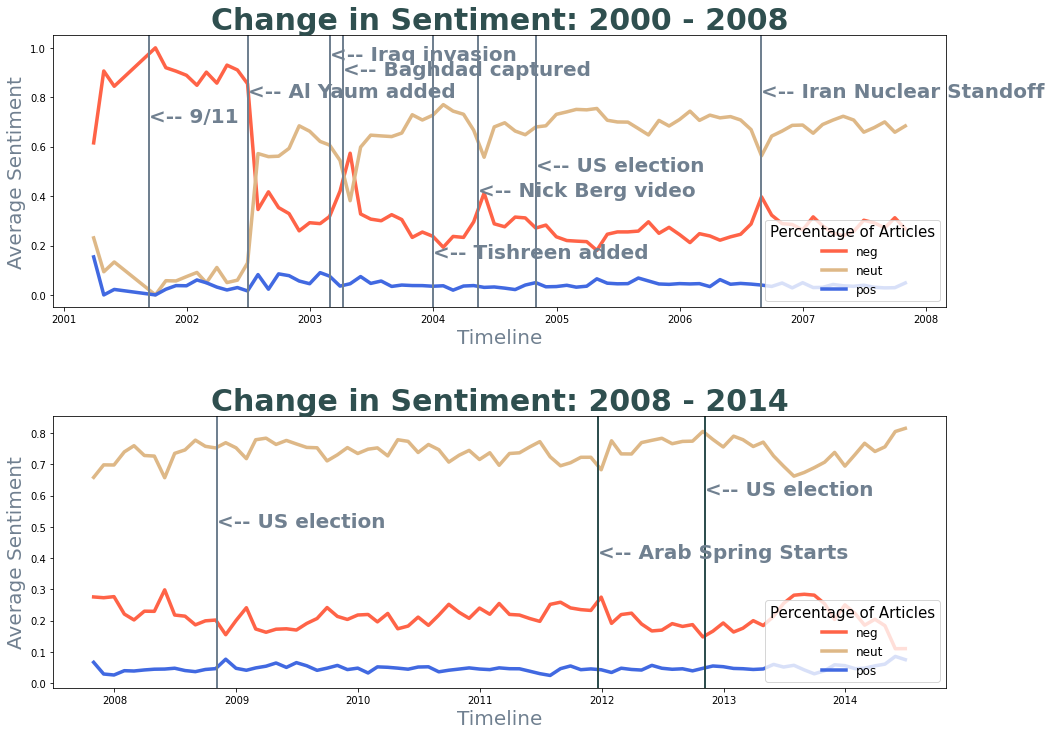

In [5]:
encoded = explore.encode_values(df, ['text_label'])
time_1, time_2 = explore.encoded_time(encoded)
explore.graph_timeline(time_1, time_2)

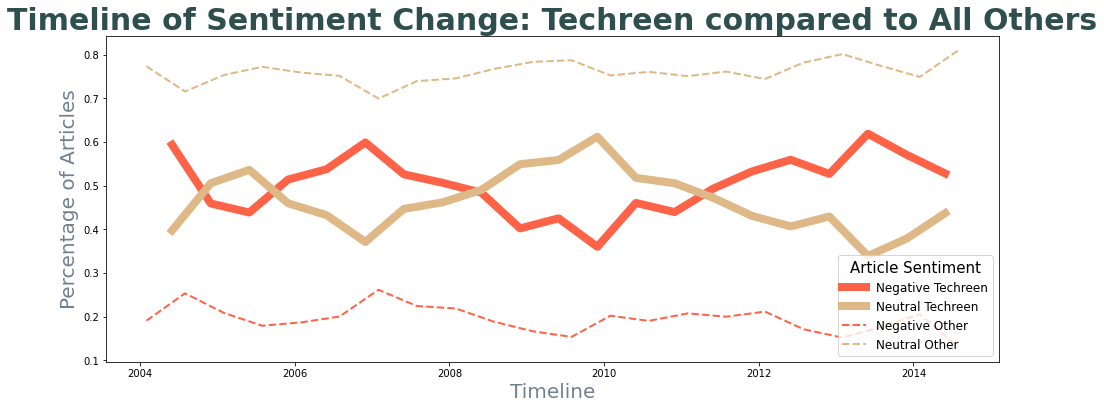

In [6]:
explore.graph_tech(encoded)

### Time Series Anaylsis Takeaway
- How does article sentiment change over time?

> - The majority of news sources were added to the corpus after 2003 so major shifts from 2000-2003 are likely due to sources being added in to the raw dataset

- Is there a relationship between article sentiment and world events?

> - Interestingly, from 2003 on, some clear changes in average sentiment amongst all sources align closely with major national and international events.

- How does the sentiment of Techreen aricles over time compare to Non-Techreen articles?

> - By comparing average sentiment per 6 months over the course of 10 years, it's clear that Techreen's snetiment change is much more volitile than non-Techreen sentiment. Non-Techreen does show to be overall very consistent compared to Techreen.


## Exploration Part 3: Drivers of Article Sentiment

### Questions to Explore : 
   > 1. What (if any) is the relationship between news sources & country to article sentiment? 
   > 2. What (if any) is the relationship between tag (article topic) to article sentiment?
   > 3. Are there any sources that have change in sentiment based on president tag?
   > 4. What (if any) is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?
   > 5. What (if any) is the relationship between Ramadan to article sentiment?

### Split data into 3 subsets for proper exploration and modeling

In [7]:
train, validate, test = explore.split_data(df)

### Question 1: What (if any) is the relationship between news sources & country to article sentiment?

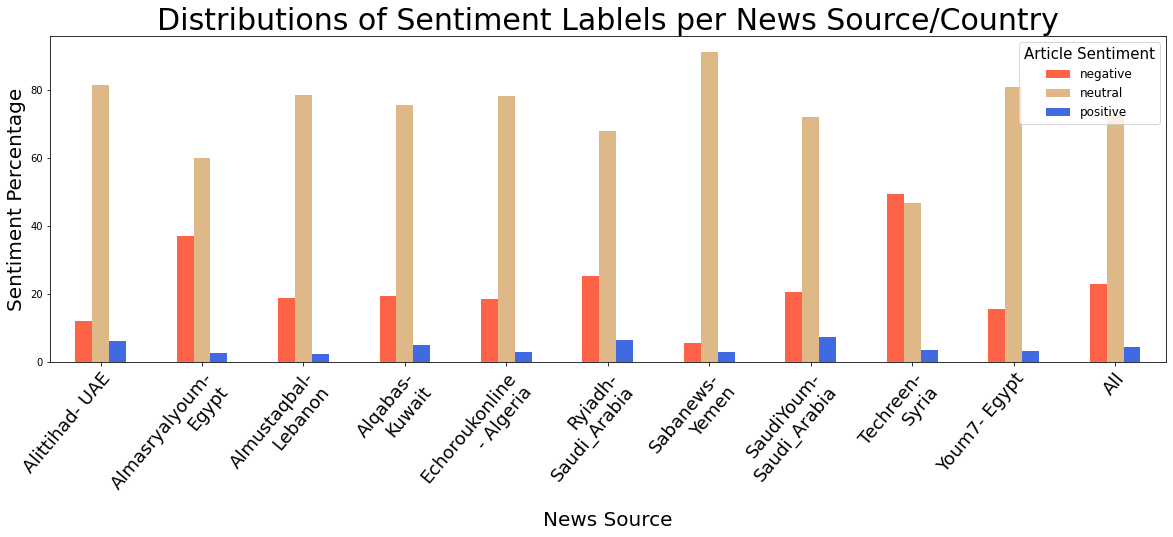

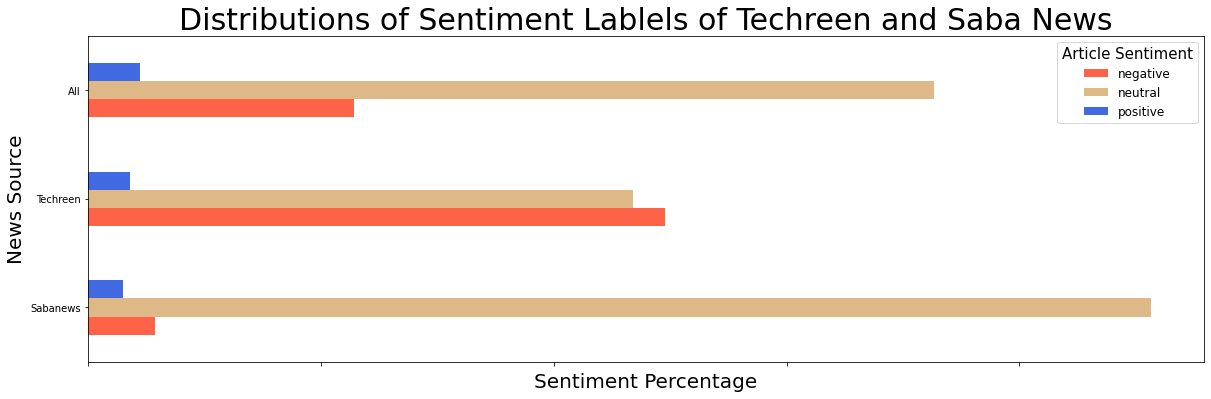

In [8]:
explore.graph_source_perc(train)

### Question 1- Chi Squared Statistical Test #1:

- $H_{0}$: The news source and text_label (sentiment) are independent of one another
- $H_{a}$: The news source and text_label (sentiment) are have a relationship

In [9]:
explore.stat_test_1(train)

Reject the null hypothesis.


### Question 1- Chi Squared Statistical Test #2:

- $H_{0}$: The news source and text_label (sentiment) are independent of one another
- $H_{a}$: The news source and text_label (sentiment) are have a relationship

In [10]:
explore.stat_test_2(train)

Reject the null hypothesis.


### Takeaways:  *What (if any) is the relationship between news sources & country to article sentiment?*

- Some individual news sources do seem to vary a bit in general sentiment trends. Noteably, the source Teshreen has a very high number of negative sentiment articles compared to the others while Saba News and Riyadh display the most overall neutrality. 
- There are 2 news sources in Eygpt and interestingly, one (Almasryalyoum) has the second highest negativity rate while the other (Youm7) appears to be one of the more neutral leaning sources. Saudi Arabia is the other country with 2 news sources (Ryiadh & SaudiYoum)   

### Question 2: What (if any) is the relationship between tag (article topic) to article sentiment?

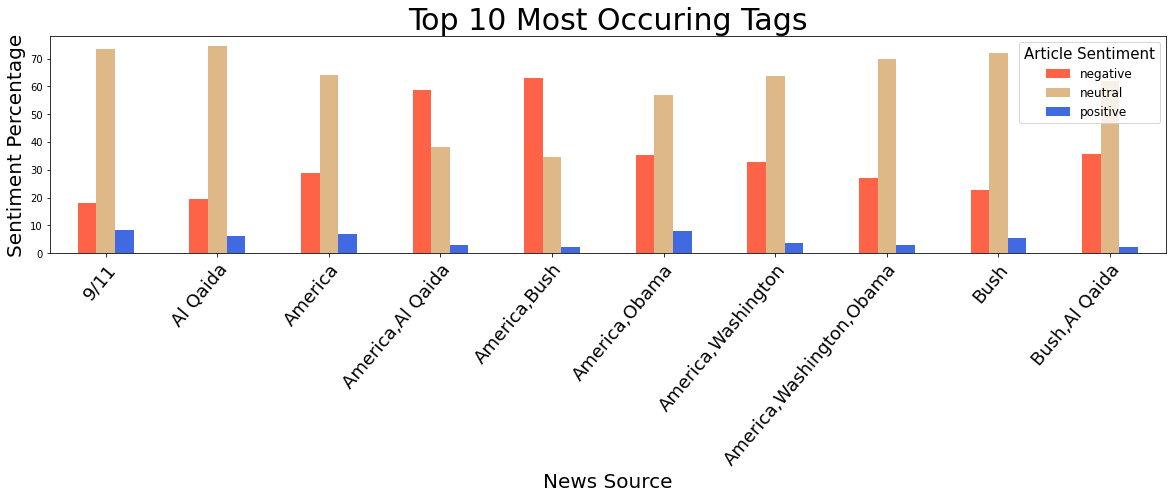

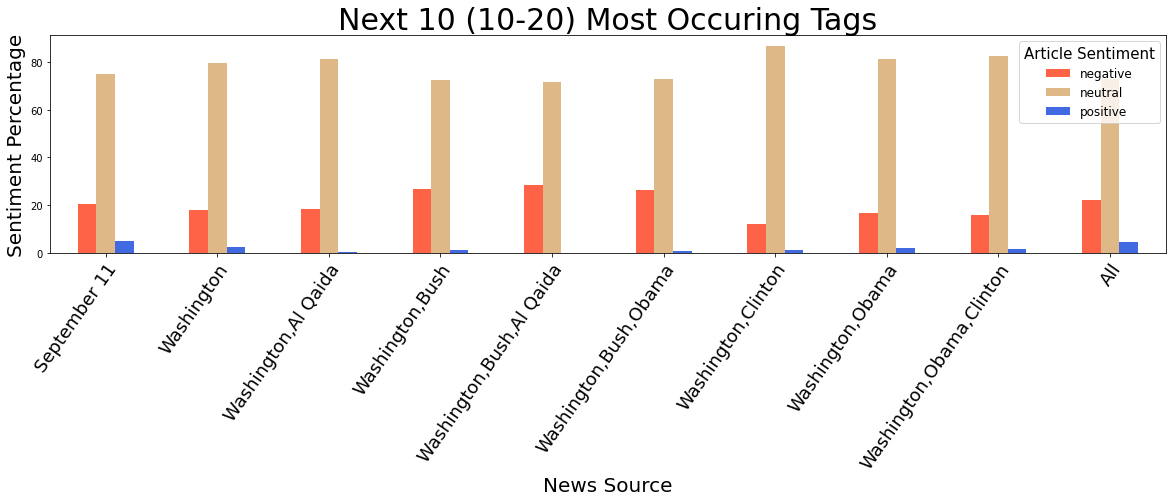

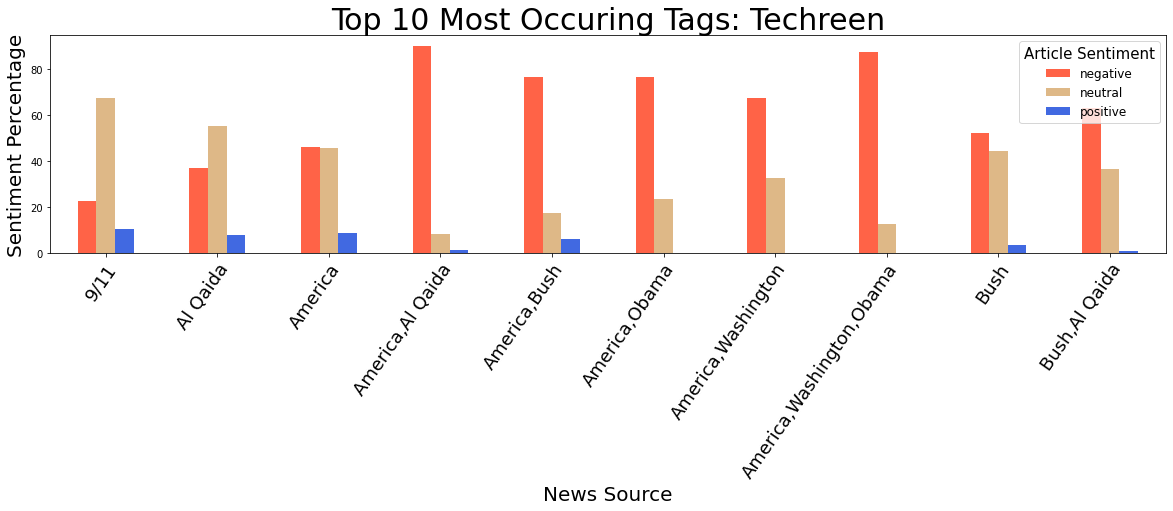

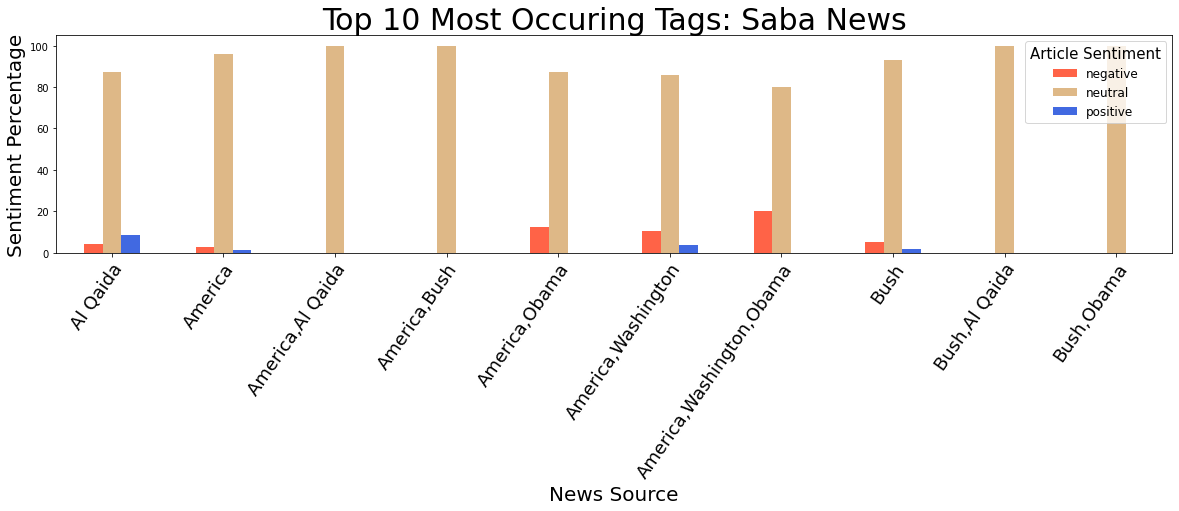

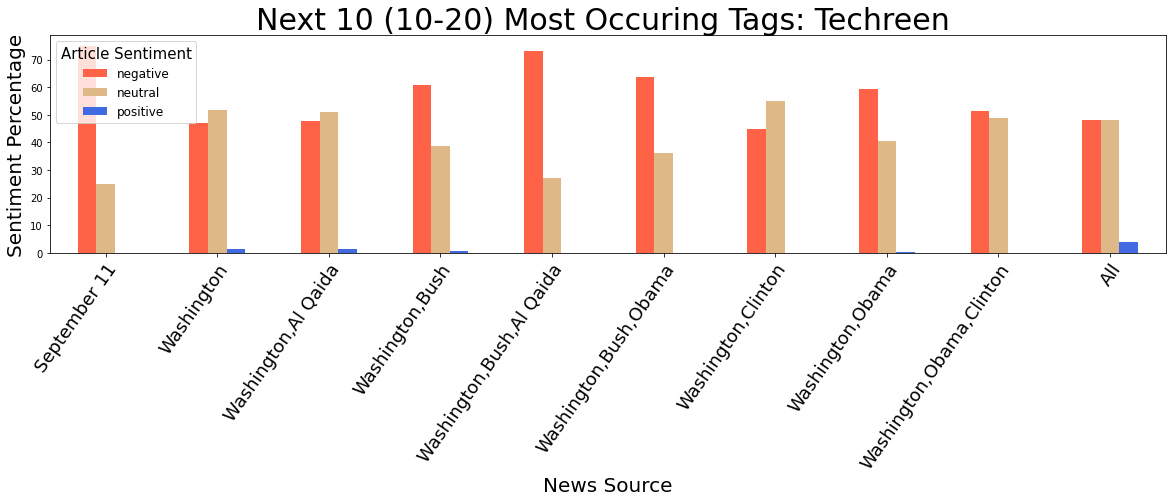

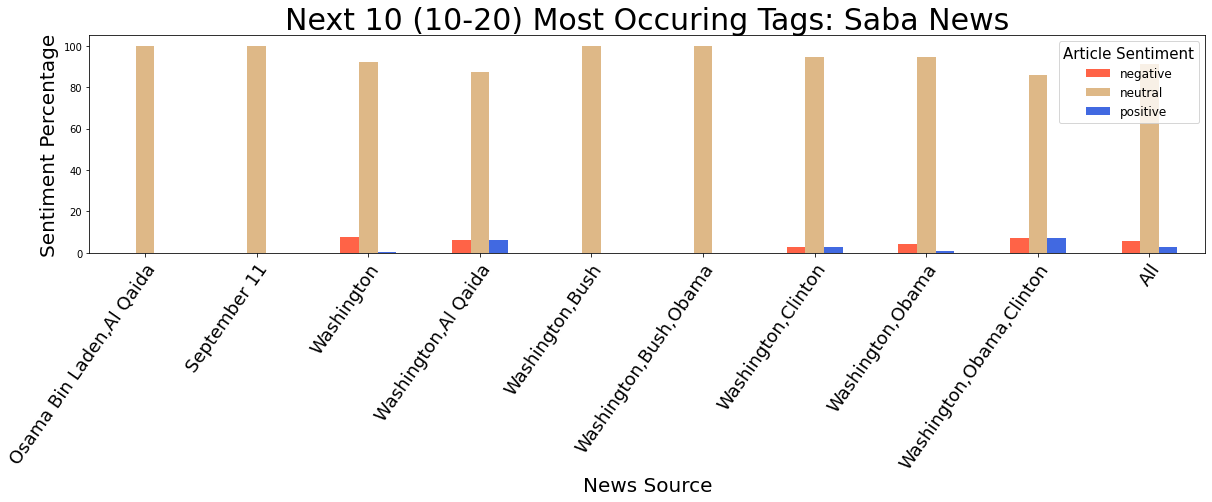

In [11]:
train['english_tags'] = train.tags.apply(explore.make_eng_tags)
top_20 = train[train['tags'].map(df['tags'].value_counts()) >= 720]
top_20['en_tags'] = top_20['english_tags'].apply(lambda x: ','.join(map(str, x)))
explore.graph_tags(top_20)

### Ouestion 2 Statistical Tests:

- $H_{0}$:: The top 10 most frequently occuring tags and and text_label (sentiment) are independent of one another
- $H_{a}$:  The top 10 most frequently occuring tags and and text_label (sentiment) are have a relationship

In [12]:
explore.stat_test_3(top_20)

Reject the null hypothesis.


### Question 2 Takeaways:
What is the relationship between most frequently occuring tags and sentiment(target)?

   -   Looking at the top 20 most frequently occuring tags, a few items stick out. The tags Al Queda, Washington, and America are the 3 highest occuring outside of president names. Interestingly, America has the highest negativity rate amongst these 3 tags. Washington and Al Queda overall sentiments are closely matched. The tag of America,Washington together has the highest negativity occurances out of the top 20 tags. The highest positive rate in the top 20 tags is seen in the tag 'Facebook'. These findings lead to further exploration in the next 2 questions.

### Ouestion 3: Are there any sources that have change in sentiment based on president tag?

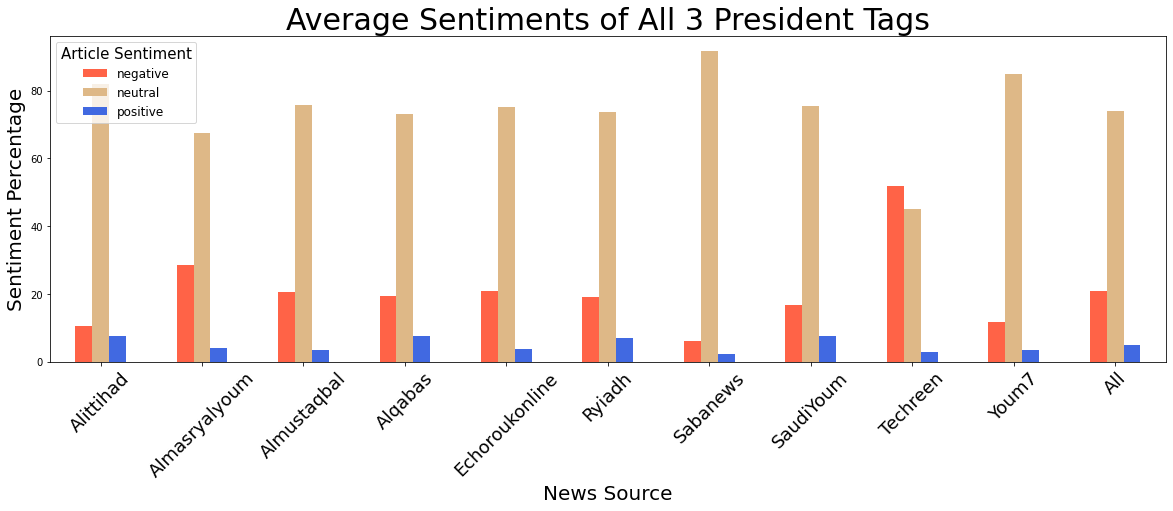

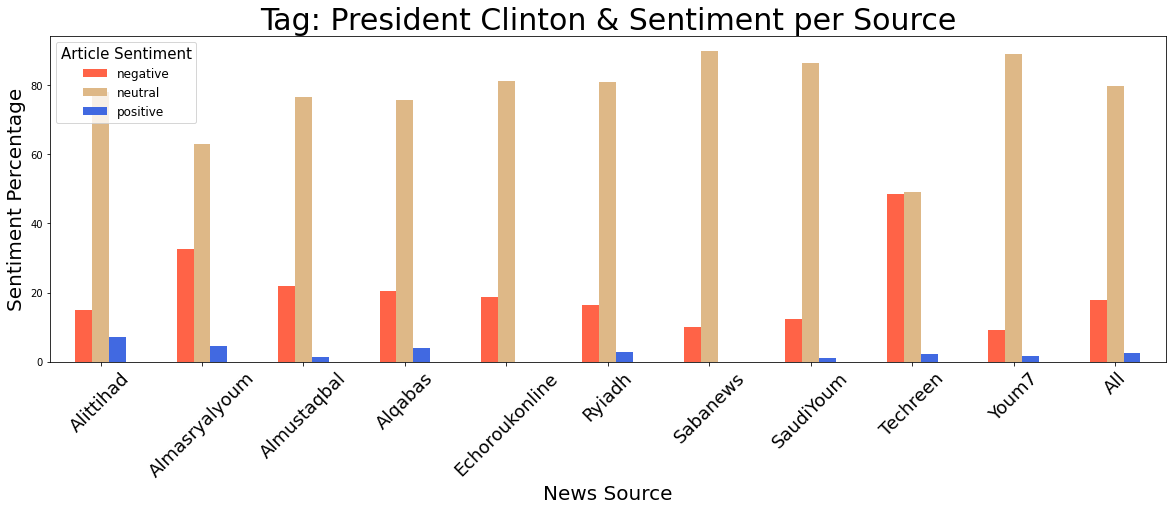

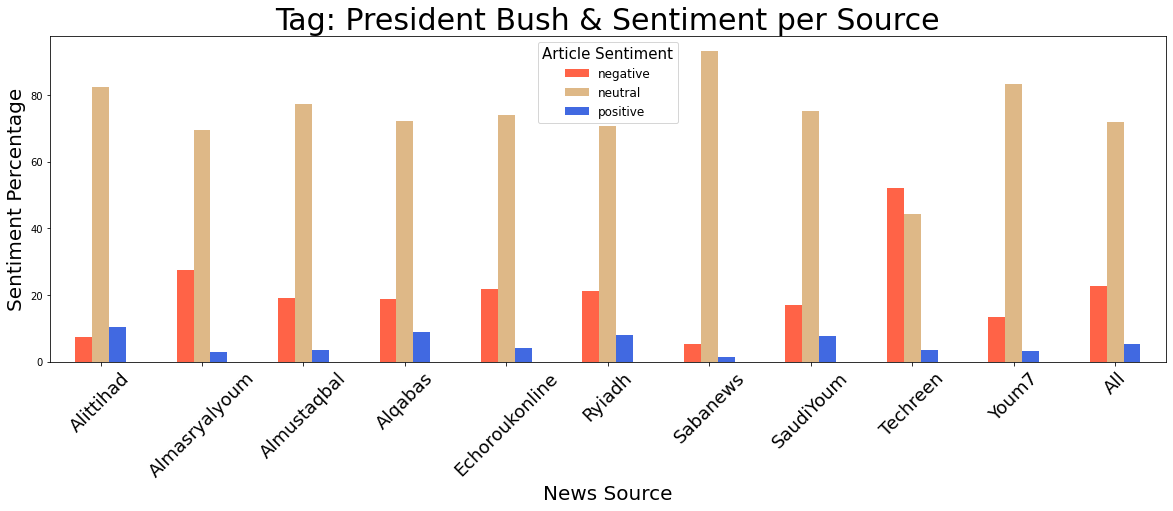

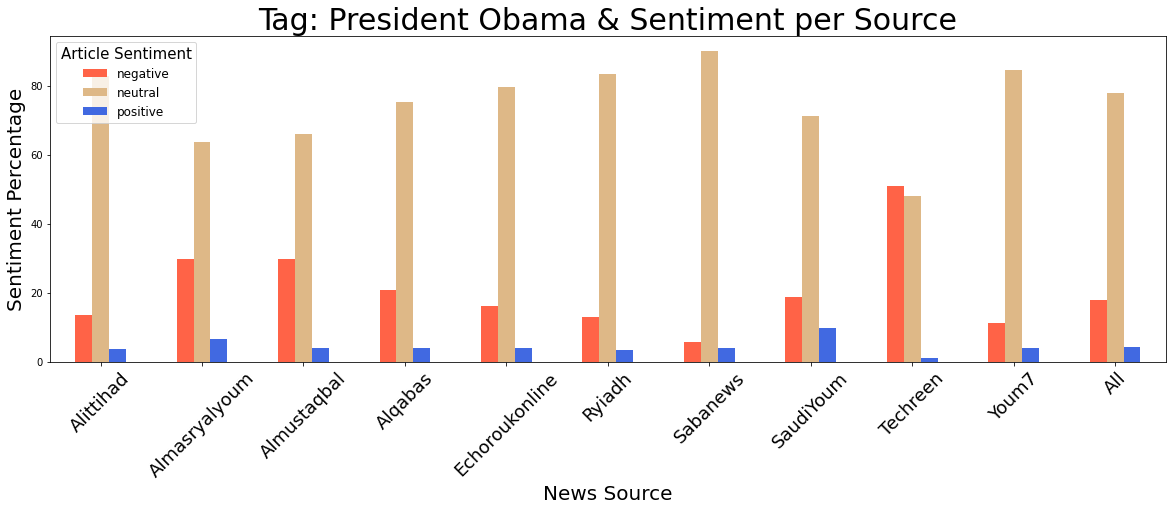

In [13]:
explore.graph_pres(train)

### Question 3 Chi Squared Statistical Test

- $H_{0}$: The US president tags and and text_label (sentiment) are independent of one another
- $H_{a}$:  The US president tags and text_label (sentiment) are have a relationship

In [14]:
explore.stat_test_4(train)

Reject the null hypothesis.


### Question 3  Takeaways:
Are there any sources that have change in sentiment based on president tag?

- Teshreen is more negative towards Bush than the other 2 presidents
- All sources averages are slightly more negative towards Buth
- Almustuqbal is noteably more negative towards Obama
- Most sources seem pretty consistent in sentiment towards presidents

## Ouestion 4: What is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?

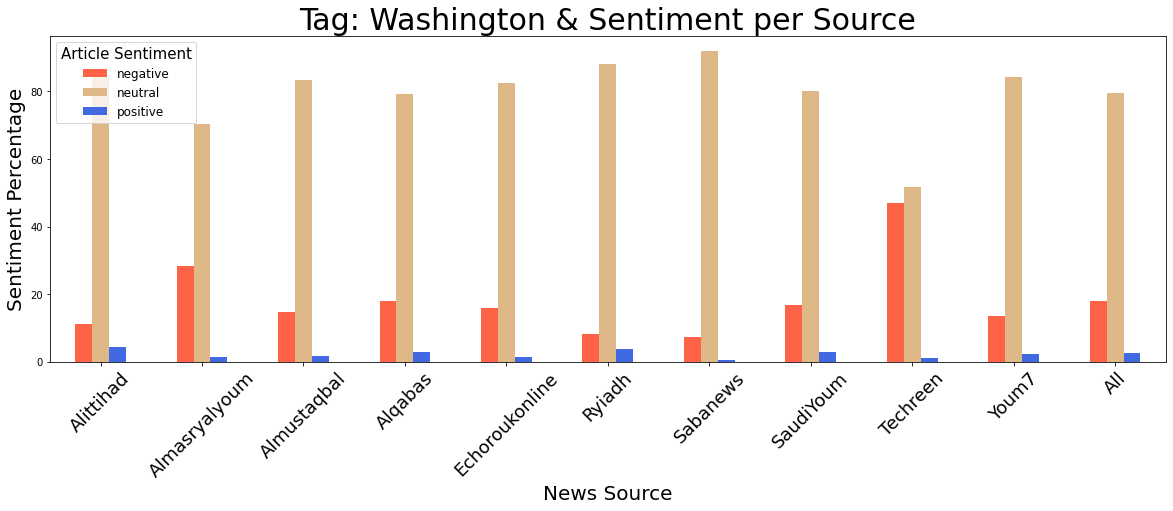

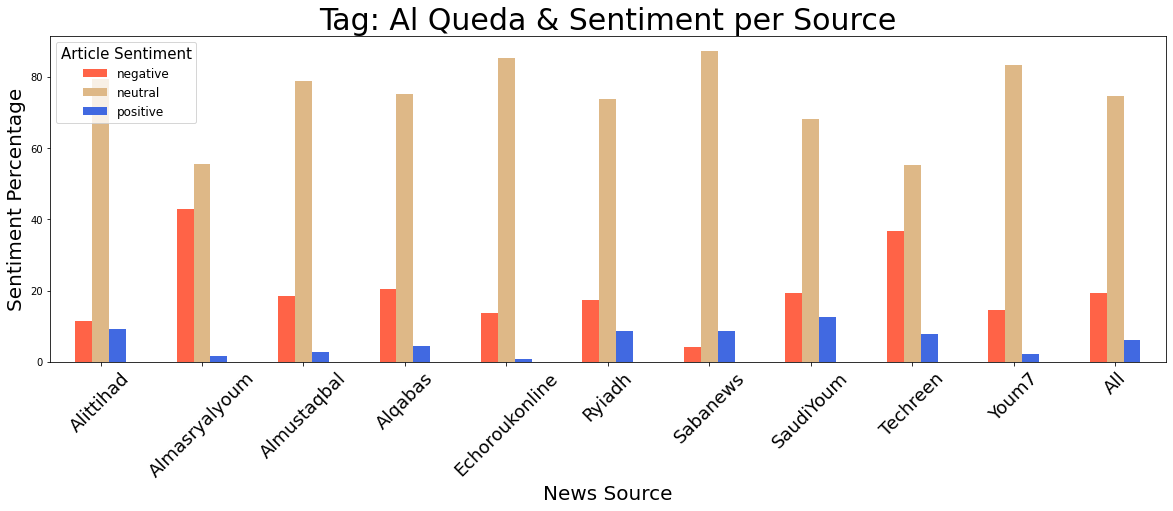

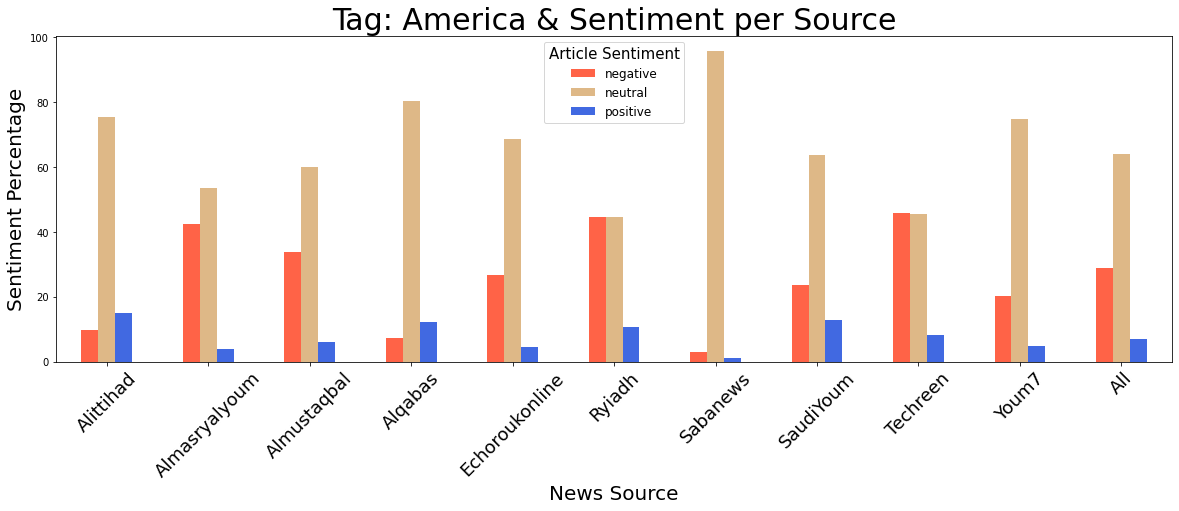

In [15]:
explore.graph_top_tags(train)

### Ouestion 4: Takeaways

What is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?

- Interestingly, most sources have slightly more negative America articles than Al Queda (over all 10% more negative for America)
- A large margin favoring Al Queda is seen with Ryiadh and Techreen
- Techreen also has a standout high negative rate for washington
- washington compared with al queda total sentiment is very close. Other than Techreen, there isn't another source that has noteable increased negativity compared to Al Queda here. Ryiadh actually has a noteable increase in neutrals in this subset

#### Exploration Summary: Summarizes all takeways from visuals, stat tests and questions. 

### Model

### Baseline
Before we model, we establish our baseline by picking the most frequently occurring target. In this case, neutral appears 72.6% of the time, making our baseline accuracy 72.6%. Anything higher than this means our model is more predictive.

In [19]:
pd.read_csv('results.csv').sort_values(by='validate_accuracy', ascending=False).head()

,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff,classification_report_validate,classification_report_train,model_type
11,12,3,0.739306,0.739702,-0.000396,-0.05,precision recall f1-score ...,precision recall f1-score ...,random_forests
12,13,2,0.739366,0.739649,-0.000283,-0.04,precision recall f1-score ...,precision recall f1-score ...,random_forests
13,14,1,0.739411,0.739492,-0.000080,-0.01,precision recall f1-score ...,precision recall f1-score ...,random_forests
8,9,6,0.738472,0.739036,-0.000564,-0.08,precision recall f1-score ...,precision recall f1-score ...,random_forests
9,10,5,0.738450,0.738878,-0.000428,-0.06,precision recall f1-score ...,precision recall f1-score ...,random_forests


After creating 150 different models, we came to the conlcusion that random forests models were performing best. These are shown above. By minimizing the difference in train and validate accuracy in the random forest model, we have a model that is generalizable and not overfitting. 

Our final model has a depth of 14, and a minimum sample leaf of one. After choosing our model, we can run it on our test set.

### Test

In [16]:
# encode and model our data with random forest
modeling.encode_and_model()

,model,depth,min_sample_leaf,train_acc,validate_acc,test_acc
0,random_forests,14,1,73.9,73.9,73.9


Our final result is that our model had an accuracy of **73.9%** on our test set.

### In conclusion (or better way of saying that)

> * Our model had an accuracy of **73.9%** on our test set, beating baseline by **1.8%**.
> * Our model is a Random Forest Classification Model, with a depth of 14 and a minimum sample leaf of one.
> * Although our model beats baseline, we do not feel confident enough to recommend it without further exploring other potential features.

**------------------------------------------------------------------------------------------**


Depending on our steps here, we can show prep such as splitting, explanations for specific features we want to use and why, etc.




What are we focusing on? What is our baseline? Why is that our baseline?


If we will be testing on different models, show results - train then takeways

Validate - validate checks for overfitting if needed and helps us decide which model to take into test if the results are very close during train. If we need to show validate, its best to explain what we're looking for and what our final decision is 

Test - one final model and results of model.


Where we talk about our results compared to baseline, did we beat it, what kind of model, etc.

#### With more time:
   - Next steps we may expand on next week, things we want to look further into
   
#### Recommendations:
    - Can kind of depend what to put here.